#Lesson 113: Hierarchical Clustering - Clustering NGO Dataset

---

### Teacher-Student Activities

In the previous class, we implemented agglomerative hierarchical clustering on a small dataset and learned how dendrograms are used to determine suitable number of clusters for clustering.

We will now proceed to solve the NGO problem statement that we had discussed before starting hierarchical clustering. Before that, let us go through the concepts covered in the previous class and revisit the NGO problem statement.








---

### Recap

#### Understanding Hierarchical Clustering

Hierarchical clustering, as the name suggests builds a hierarchy of clusters.

Like K-Means, hierarchical clustering also groups data points having similar characteristics together. However, unlike K-Means, this algorithm does not require us to specify the number of clusters (`K`) beforehand. The algorithm on itself deduces the optimum number of clusters and displays it in the form of a tree-like structure.

Let us understand this concept using a simple example.

Imagine that we were simply presented with two features
of animals:
- `height` (measured from the tip of the nose to the end of the tail).
- `weight`

|height|weight|
|-|-|
|22|40|
|25|43|
|17|37|
|35|60|
|37|53|
|41|62|

Since we are given only the animal's heights and weights, we won't be able to speculate the exact name of each species. However, by creating clusters of these animals on the basis of the features provided, we can derive different categories of animal species that exist in this dataset.



In [ ]:
# Create numpy array of animal heights and weights.
import numpy as np
import pandas as pd
animals_arr = np.array([[22, 40], [24, 43], [17, 37], [35, 60], [37, 53], [41, 62]])
animals_arr

array([[22, 40],
       [24, 43],
       [17, 37],
       [35, 60],
       [37, 53],
       [41, 62]])

Let's plot the above data points using a scatter plot. Also, annotate each data point with a number. For example, the first data point must be labelled as `1`, the second data point must be labelled as `2` and so on. For this purpose, use the `annotate()` function of `matplotlib.pyplot` module.

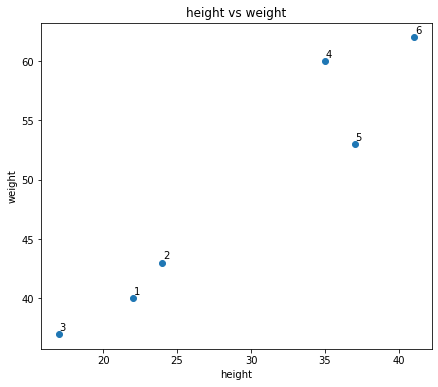

In [ ]:
# Create a scatter plot showing animal height and weight with each animal numbered from 1 to 6.
import matplotlib.pyplot as plt

animal_lbl = range(1, 7)
plt.figure(figsize = (7, 6))
plt.title('height vs weight')
plt.xlabel('height')
plt.ylabel('weight')

plt.scatter(animals_arr[:,0], animals_arr[:,1])

for label, x, y in zip(animal_lbl, animals_arr[:, 0], animals_arr[:, 1]):
    plt.annotate(label, xy = (x, y), xytext = (1, 4), textcoords ='offset points')
plt.show()

Thus, we have a sample of 6 data points having the following $x$-coordinate and  $y$-coordinate values:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1|22|40|
|2|24|43|
|3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

One approach of hierarchical clustering is by starting with each data point in its own cluster and recursively joining the similar points together to form clusters. This approach is known as **Agglomerative hierarchical clustering**.

**Agglomerative hierarchical clustering:**
- This algorithm begins with each data point as a single cluster and then combines the closest pair of clusters together.
- It does this until all the clusters are merged into a single cluster that contains all the data points.

Let us learn how agglomerative hierarchical clustering works on the above dataset.

**Step 1:** The clustering begins with each data point in its own cluster. As there are 6 data points in the `animals_arr` dataset, so the number of clusters will be `6`.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/52fc46ca-d035-4f9d-8c45-9d7bf42eb398.png"/></center>

**Step 2:** Take two closest data points or clusters and merge them to form one cluster. For this, the Euclidean distance between each  data point is calculated.

From the above scatter plot, it is clearly visible that data points $1$ and $2$ are closest to each other. Let us verify this by computing the Euclidean distance between each of these data points using `distance_matrix()` function of `scipy.spatial` module. This function returns a proximity matrix which will tell us the distance between each of these points.

Use `help()` function to learn more about the `distance_matrix()` function.

In [ ]:
# Use 'distance_matrix()' function to compute the euclidean distance between each of the data points.
from scipy.spatial import distance_matrix
pd.DataFrame(distance_matrix(animals_arr, animals_arr), index = animal_lbl, columns = animal_lbl)

,1,2,3,4,5,6
1,0.000000,3.605551,5.830952,23.853721,19.849433,29.068884
2,3.605551,0.000000,9.219544,20.248457,16.401219,25.495098
3,5.830952,9.219544,0.000000,29.206164,25.612497,34.655447
4,23.853721,20.248457,29.206164,0.000000,7.280110,6.324555
5,19.849433,16.401219,25.612497,7.280110,0.000000,9.848858
6,29.068884,25.495098,34.655447,6.324555,9.848858,0.000000


**Note:** The diagonal elements of this proximity matrix will always be 0 as the distance of a point with itself is always 0.


From the above distance matrix, we can observe that distance between data point $1$ (`[22, 40]`) and data point $2$ (`[24, 43]`) is the least. Hence, the data points $1$ and $2$ join into a single cluster. Now, there will be 5 clusters.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/0e58c966-13e3-47f0-894a-d8c0f3697491.png"/>

The updated clusters after merging data points $1$ and $2$ are:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1, 2|22|40|
|3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

Here, we have taken the minimum of data point $1$ and data point $2$ i.e. `min([22, 40], [24, 43])` to replace the distance for the merged cluster $\{1, 2\}$. Instead of the minimum, we can take the maximum value or the average values as well. These measures are called **Linkage methods**. We will learn them in more detail in the upcoming section.

Now, the proximity matrix for these new clusters is again calculated:

||1, 2|	3|	4|	5|	6|
|-|-|-|-|-|-|
|1, 2|	0.000000|	5.830952|	23.853721	|19.849433|	29.068884|
|3|	5.830952|	0.000000|	29.206164	|25.612497|	34.655447|
|4|	23.853721|	29.206164|	0.000000|	7.280110|	6.324555|
|5|	19.849433|	25.612497|	7.280110|	0.000000|	9.848858|
|6|	29.068884	|34.655447|	6.324555|	9.848858|	0.000000|

**Step 3:** Again, take the two closest clusters and merge them together to form one cluster.

From the above proximity matrix, we can observe that distance between data point $\{1, 2\}$ (`[22, 40]`) and data point $3$ (`[17, 37]`) is the least. Hence, the data points $\{1, 2\}$ and $3$ join into a single cluster. Now, there will be 4 clusters.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/3c175de3-24dd-4235-bfd5-a631a2b56352.png"/>

The updated clusters after merging data points $\{1, 2\}$ and $3$ are:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1, 2, 3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

Again, we have taken the minimum of data point  $\{1, 2\}$ and data point $3$ i.e. `min([22, 40], [17, 37])` to replace the distance for the merged cluster $\{1, 2, 3\}$.

Now, the proximity matrix for these new clusters is again calculated:

||1, 2,3|	4|	5|	6|
|-|-|-|-|-|
|1, 2, 3|	0.000000|	29.206164	|25.612497|	34.655447|
|4|	29.206164	|0.000000	|7.280110	|6.324555|
|5|	25.612497|	7.280110|	0.000000|	9.848858|
|6|		34.655447	|6.324555|	9.848858|	0.000000|



**Step 4:** Repeat Step 3 until only one cluster is left. So, we will get the following clusters.

<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/0548444c-c789-45f5-a07b-4d03640dc8a2.png"/>
<br/>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/55f4107d-08de-4e2d-8d51-b1e6616af5e2.png"/>
<br/>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/07ed6f82-b34d-4b6b-8a4d-26b676e240f1.png"/>


The sequences of these merges are recorded in a tree-like structure called a **dendrogram**. Dendrograms provides a great way to illustrate the arrangement of the clusters produced by hierarchical clustering. Thus, the dendrogram for the above dataset clustering will look like this:
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/37400f1e-b7c1-48e8-bc98-c6ebf51586d8.png"/>

In the above diagram, the left part shows the corresponding dendrogram for the agglomerative clustering done with the `animals_arr` dataset. In a dendrogram plot, the $y$-axis shows the Euclidean distances between the data points, and the $x$-axis shows all the data points of the given dataset.

- As we have discussed above, firstly, the data points $1$ and $2$ combine together and form a cluster, correspondingly a dendrogram is created, which connects $1$ and $2$  with a rectangular shape. The height is decided according to the Euclidean distance between the data points.
- Similarly, all the merging of clusters can be depicted in a dendrogram. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.


#### Implementing Dendrogram using Python

Before implementing the dendrogram, we will first understand different linkage methods, as this is an important parameter for dendrogram plotting.

**Linkage:**

In general, the linkage is distance between two clusters.

In the previous activity, we merged two clusters by considering the minimum distance between two clusters as the new distance of the merged cluster. This method is known as *Single Linkage*.

However, this is not the only option when it comes to clustering data points together. Other choices for determining distances between clusters are as follows:

**1. Single Linkage**
  - In a single linkage, the distance between two clusters is the shortest distance between two points in the two clusters.

    For example, consider the following two clusters:

   <img src="https://s3-whjr-v2-prod-bucket.whjr.online/c764aba8-814a-4b2b-ba62-ba9d622c264f.png"/>

  - In the above example, the distance between green and red clusters would be the distance between data points $2$ and $5$ as per single linkage criteria.


**2. Complete Linkage**

  - It is the opposite of single linkage.
  - In complete linkage, the distance between two clusters is the farthest distance between two points in two clusters.

    For example,

   <img src="https://s3-whjr-v2-prod-bucket.whjr.online/19f57629-a87d-46c2-b283-58f89edcddca.png"/>

  - In the above example, the distance between green and red clusters would be the distance between data points $3$ and $6$ as per complete linkage criteria.


**3. Average Linkage**
  -  It is between single and complete linkage.   
  - In average linkage, the distance between two clusters is the average distance between every point of one cluster to every other point of the other cluster.

**4. Centroid Linkage**
  - In centroid linkage, the distance between two clusters is the distance between centroids of those clusters.

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/949bfe9d-3eb7-41c5-8163-3dc4b6496121.png"/>

**5. Ward Linkage**
 - This approach  is the same as Average Linkage except that Ward's method calculates the sum of the square of the distances between every point of one cluster to every other point of the other cluster.

From the above given linkage methods, we can apply any of them according to the type of problem or business requirement.

Let us now plot the dendrogram for the `animals_arr` dataset.

**Plotting Dendrogram:**

The `scipy.cluster` module equips us with tools that are needed for hierarchical clustering and dendrogram plotting.

The dendrogram can be plotted easily using the linkage matrix. A linkage matrix is created via `linkage()` function. This matrix contains the distance between clusters based on the specified linkage method. Following is the syntax of `linkage()` function:

`hierarchy.linkage(data, method= 'single')`

Here,
 - `data:` The dataset (input 1D/2D array).
 - `method`: Linkage methods. Default value is `'single'`. Other values are `'complete'`, `'average'`, `'centroid'`, `'ward'`.

Follow the steps given below to plot the dendrogram:

1. Import `linkage` and `dendrogram` functions from `scipy.cluster.hierarchy` module.
2. Call `linkage()` function and pass `animals_arr` dataset and `method = single` as inputs. Store the returned linkage matrix in a `s_distances` variable.
3.  Plot the dendrogram by calling the `dendrogram()` function and pass the linkage matrix `s_distances` as input to this function. Also, pass `labels = animal_lbl` as input to `dendrogram()` function to label the data points on $x$-axis.

4. Also, set the `xlabel` and `ylabel` of this dendrogram using `matplotlib.pyplot` module.

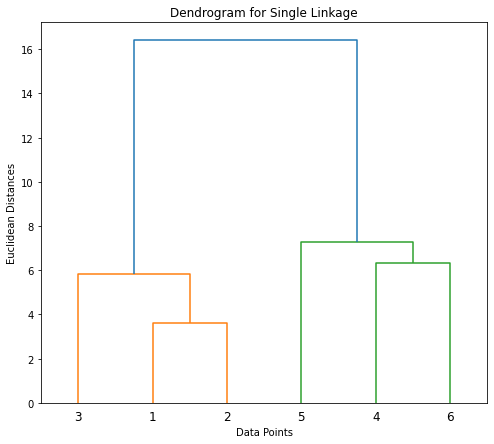

In [ ]:
# Plot dendrogram for single linkage.
from scipy.cluster.hierarchy import linkage, dendrogram
s_distances = linkage(animals_arr, method = "single")

plt.figure(figsize = (8, 7))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Single Linkage")
dendrogram(s_distances, labels = animal_lbl)
plt.show()


Consider the dendrogram that we had obtained for a single linkage.

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/e2cd8fba-1d31-49b8-b65f-2dd9470a3200.png"/></center>

We can see that the largest vertical distance without any horizontal line passing through it is represented by the <b><font color=blue>blue</font></b> line. So we draw a new horizontal black line that passes through this blue vertical line. Since this black line crosses the dendrogram at three points, therefore the optimal number of clusters for this model will be **3**.

Basically the horizontal black line is a **threshold**, which defines the minimum distance required to be a separate cluster. If we draw the line a little up, the threshold required to be a new cluster will be increased and less clusters will be formed as seen in the image below:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/02b74133-13ad-4165-bcb0-65f24b723401.png"/></center>

In the above image, the horizontal line passes through two vertical lines resulting in two clusters:
 - The first cluster of points 3, 1 and 2.
 - The second cluster of points 5, 4 and 6.


Thus, dendrogram brings a really nice feature: we can read off as many clusters as we want.  We need not decide how many clusters we want at the beginning.

---

#### NGO Problem Statement

An international charitable NGO  raised around $\$$10 million after a few funding programmes. The CEO of the NGO needs to decide which countries are in immediate need of this fund so that these funds are utilised optimally and effectively.

Our job is to cluster the countries using some socio-economic and health factors that determine the overall development of the country and provide suggestion of the countries to the CEO of the NGO.

We will use a dataset of 167 countries consisting of the following attributes:

|Attribute|Description|
|-|-|
|`country`|Name of the country.|
|`child_mort` | Death of children under 5 years of age per 1000 live births.|
|`exports`| Exports of goods and services per capita. Given as percentage of the GDP per capita.|
|`health`| Total health spending per capita. Given as a percentage of GDP per capita.|
|`imports` | Imports of goods and services per capita. Given as a percentage of the GDP per capita.|
|`income` | Net income per person.|
|`inflation` | The measurement of the annual growth rate of the Total GDP.|
|`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same.|
|`total_fer` |The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population.|

**Dataset Credits:** https://www.kaggle.com/gauravduttakiit/help-international

---

#### Activity 1: Loading the Dataset

Let's import the necessary Python modules and read the data from a csv file to create a Pandas DataFrame.



**Dataset Link:**  https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv



In [ ]:
# S1.1: Import the Python modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv"
ngo_df = pd.read_csv(file_path)
ngo_df.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Now, let's find out the total number of rows and columns, data types of columns and missing values (if they exist) in the dataset.


In [ ]:
# S1.2: Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There are **167 rows and 10 columns** and no missing values in the dataset. Out of the 10 columns, 9 are numerical and only 1 categorical column is present which is the name of the country.

---

#### Activity 2: Data Preparation and EDA

From the dataset description, we may observe that  the values of  `exports`, `health`, and `imports` columns are expressed in the form of a percentage of the GDP (`gdpp`).

Let us change these column values from  percentage of total GDP to actual values, as the percentage values may not give a clear picture of that country.




In [ ]:
# S2.1: Convert column values from percentage to actual values.
ngo_df['exports'] = (ngo_df['exports'] * ngo_df['gdpp']) / 100
ngo_df['health'] = (ngo_df['health'] * ngo_df['gdpp']) / 100
ngo_df['imports'] = (ngo_df['imports'] * ngo_df['gdpp']) / 100
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Now, create a new DataFrame consisting of only numeric columns. Also, we will scale the numerical DataFrame so that all the columns have the same mean and variance to perform clustering.

In [ ]:
# S2.2: Keep only the numerical columns.
new_df = ngo_df.drop(columns = 'country')
print(new_df)

     child_mort  exports    health   imports  income  inflation  life_expec  \
0          90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1          16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2          27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3         119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4          10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   
..          ...      ...       ...       ...     ...        ...         ...   
162        29.2  1384.02  155.9250  1565.190    2950       2.62        63.0   
163        17.1  3847.50  662.8500  2376.000   16500      45.90        75.4   
164        23.3   943.20   89.6040  1050.620    4490      12.10        73.1   
165        56.3   393.00   67.8580   450.640    4480      23.60        67.5   
166        83.1   540.20   85.9940   451.140    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1  

Now, normalize the columns of the DataFrame.

In [ ]:
# S2.3: Normalise the column values.
# Import the StandardScaler module from sklearn
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scale_df = std.fit_transform(new_df)
scale_df = pd.DataFrame(scale_df,columns = new_df.columns)
# Fit and Transform the DataFrame
print(scale_df)


     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   
1     -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347   
2     -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274   
3      2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   
4     -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578 -0.336864 -0.501562 -0.342488 -0.738527  -0.489784   
163   -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   3.616865   
164   -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   0.409732   
165    0.448417 -0.392166 -0.550596 -0.418479 -0.658924   1.500916   
166    1.114951 -0.383952 -0.540498 -0.418445 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

Now, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the numeric variables and plot a heat map.

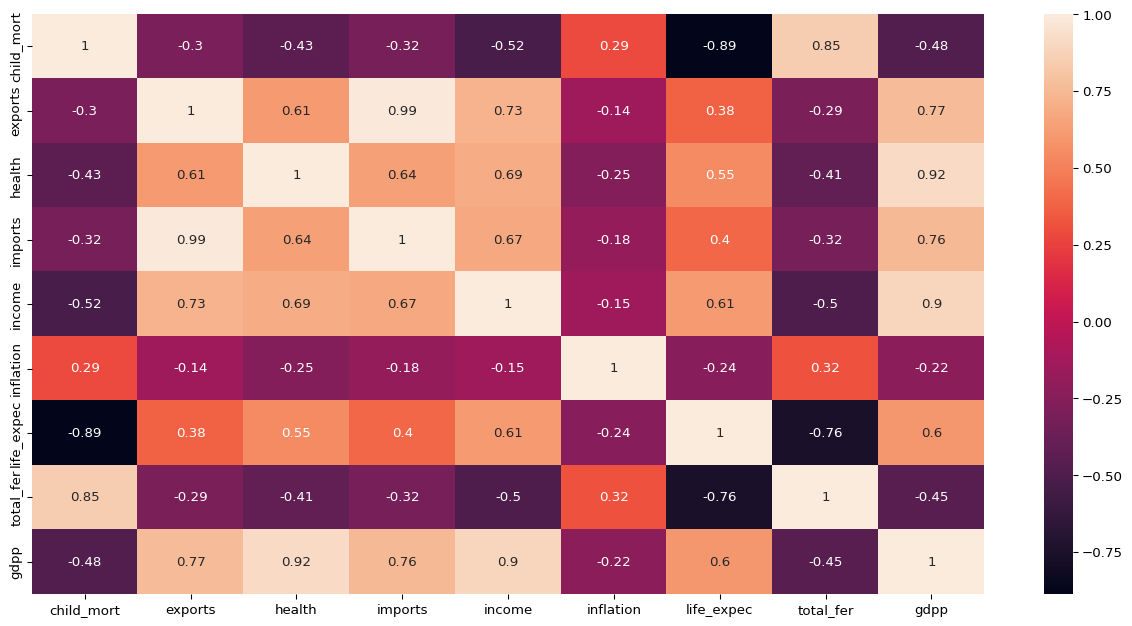

In [ ]:
# S2.4: Create a correlation heatmap.
plt.figure(figsize=(16,8),dpi= 96)
sns.heatmap(scale_df.corr(),annot = True)
plt.show()

From the above correlation heatmap, we can observe that:

- `gdpp` and `income` have  high positive correlated with correlation of `0.9`. This means that the countries where people have high income will have high GDP.

- `child_mort` and `life_expec` are negatively correlated with a high correlation of `-0.89`. Thus, the child mortality rate greatly impacts the overall life expectancy of the population.

- `child_mort` and `total_fer` are highly correlated with correlation of `0.85`. It may be due to the fact that if child mortality is higher, people may opt for more children.

- `imports` and `exports` are highly correlated with correlation of `0.99`.

- `gdpp` and `health` are highly correlated with correlation of `0.92`.

- `life_expec` and `total_fer` are negatively correlated with a high correlation of `-0.76`.  It may be due to unavailability of  health care system for better care for children as well as care for family planning.

Let us now plot boxplots to understand the distribution of numerical columns and detect whether there are any outliers in the dataset. Use subplots to create these boxplots.

Before plotting boxplots, let us give colours to our boxplots by building a colour palette. To build a colour palette, use the `color_palette()` function of `seaborn` module which will return a list of colours defining a palette.

For more detailed syntax of `color_palette()` function, use `help()` function.

Steps to build a colour palette
1. Create a colour palette for colouring the 9 boxplots using the `color_palette()` function and pass `bright` as input to this function.
2. Store the returned colour palette in a variable `bp_palette` and use `palplot()` function of `seaborn` module to display the colors present in the colour palette.

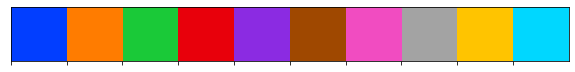

In [ ]:
# S2.5: Save a palette to a variable.
plate = sns.color_palette('bright')
sns.palplot(plate)
# Use palplot and pass in the variable:


From the output, you may observe that we obtained a colour palette consisting of 10 colours. Let us print the RGB values of the first three colours of the `bp_palette` variable.

In [ ]:
# S2.6: Print RGB values of the first three colours i.e. blue, orange, and green.
plate[0:3]

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549)]

Hence, we obtained RGB values as a tuple of the first three colours, i.e., blue, orange, and green in the `bp_palette` colour palette.

Let us now create boxplots using subplots for all the 9 columns of the `ngo_num` DataFrame and colour them using colour palette `bp_palette`.

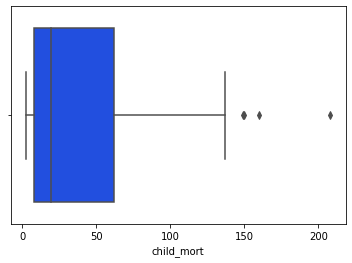

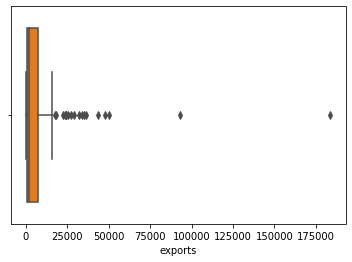

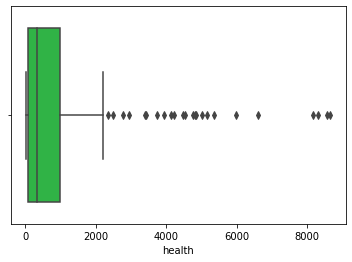

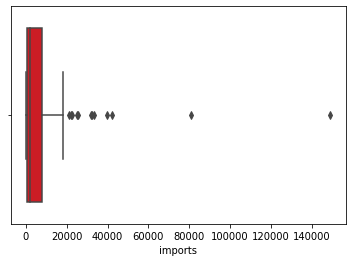

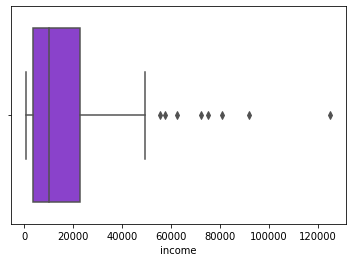

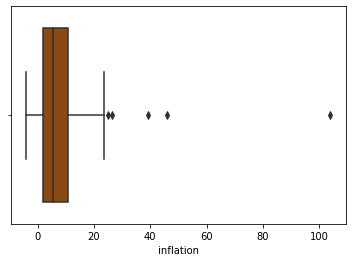

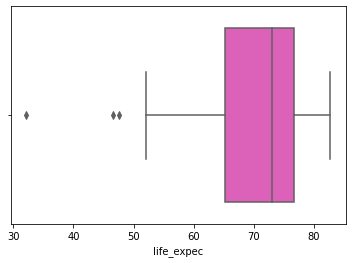

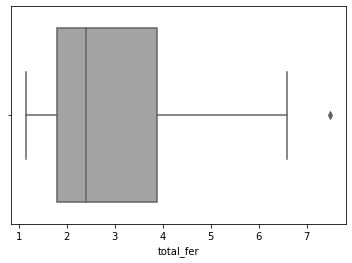

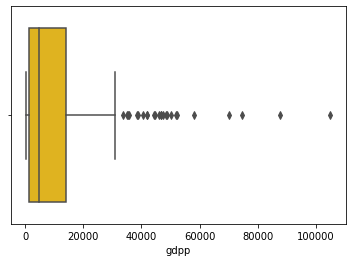

In [ ]:
# S2.5: Create boxplots for numeric columns using subplot.
sns.boxplot(data = new_df,x = new_df.iloc[:,0],color = plate[0])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,1],color = plate[1])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,2],color = plate[2])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,3],color = plate[3])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,4],color = plate[4])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,5],color = plate[5])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,6],color = plate[6])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,7],color = plate[7])
plt.show()
sns.boxplot(data = new_df,x = new_df.iloc[:,8],color = plate[8])
plt.show()

We may observe that there is atleast one outlier in all the features. In case of gdpp and health, there are too many outliers.

However, since we have limited number of countries (167 countries), removing these outliers  based on IQR (Inter-quartile range) values would remove few countries that really deserved the financial aid. Hence, we would not remove the outliers.


Let us obtain the statistical summary of the numerical features of the dataset.



In [ ]:
# S2.6: Obtain statistical summary of the dataset
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Let us create a barplot that shows the top $30$ countries exhibiting the highest `child_mortality_rate` using the steps given below:

1. Create a DataFrame that consists of two columns, `country` and `child_mort`.
2. Use `sort_values()` function to sort columns of this DataFrame in descending order of `child_mort` column. Also, use `head(30)` function with `sort_values()` function to obtain only top 30 countries.
3. Create a barplot with `country` values on $x$-axis and `child_mort` on $y$-axis.

**Note:** Use `plt.xticks(rotation = 45)` to rotate the $x$-axis labels by $45^o$ so that labels do not overlap each other.



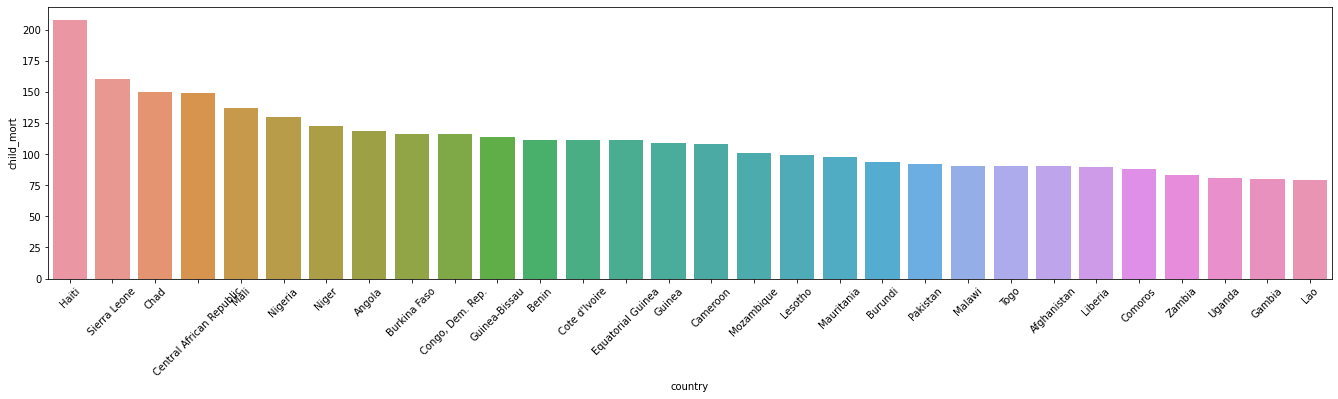

In [ ]:
# S2.7: Create a DataFrame for child mortality rate in descending order.
child_mort_df = ngo_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(30)

# Plot top 30 countries exhibiting highest child mortality rate.
plt.figure(figsize = (23,5))
sns.barplot(x = 'country', y = 'child_mort', data = child_mort_df)
plt.xticks(rotation = 45)
plt.show()

Here we observe that the **Haiti** country exhibits the highest child mortality rate of around $200$ which is quite high. Recall that the mean child mortality rate obtained from the dataset was $38.3$ compared to which Haiti has quite high child mortality rate.

Next, let us obtain a similar barplot for the top $30$ countries which spends the lowest per capita for healthcare using the steps given below:

1. Create a DataFrame that consists of two columns, `country` and `health`.
2. Use `sort_values()` function to sort columns of this DataFrame in ascending order of `health` column. Also, use `head(30)` function with `sort_values()` function to obtain only top 30 countries.
3. Create a barplot with `country` values on $x$-axis and `health` on $y$-axis.



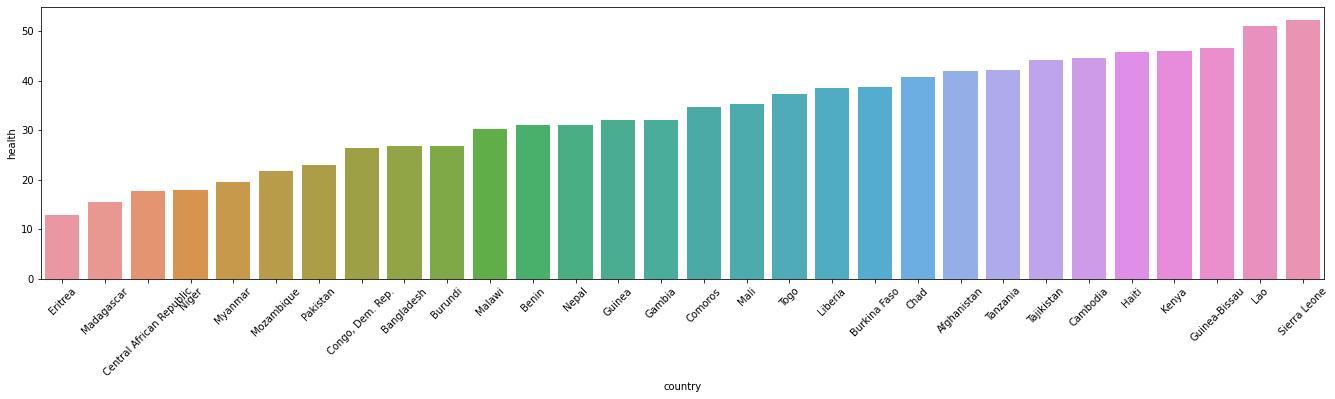

In [ ]:
# S2.8: Obtain DataFrame for heath expenditure in ascending order
health_df = ngo_df[['country','health']].sort_values('health', ascending = True).head(30)
# Plot top 30 countries exhibiting lowest health expenditure.

plt.figure(figsize = (23,5))
sns.barplot(x = 'country', y = 'health', data = health_df)
plt.xticks(rotation = 45)
plt.show()

Here we observe that the country **Eritrea** exhibits minimum spends. However this is not a true indicator as lower spending can also imply an excellent living condition in the country. However, it can also mean the country is poor and does not have enough resources/income to spend on healthcare services.

So next let's check the top $30$ countries with the lowest net income per person using the steps given below:

1. Create a DataFrame that consists of two columns, `country` and `income`.
2. Use `sort_values()` function to sort columns of this DataFrame in ascending order of `income` column. Also, use `head(30)` function with `sort_values()` function to obtain only top 30 countries.
3. Create a barplot with `country` values on $x$-axis and `income` on $y$-axis.


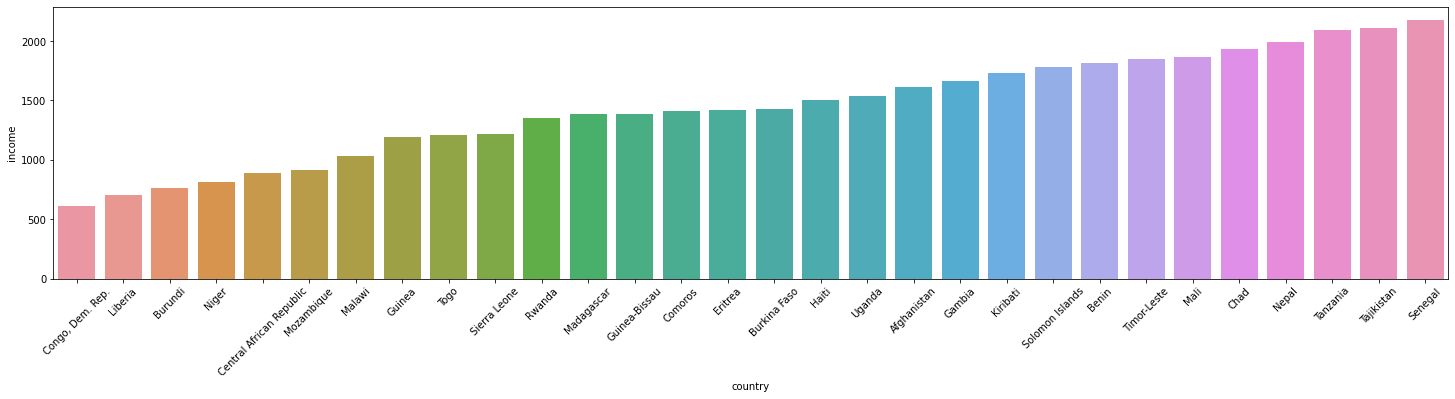

In [ ]:
# S2.9: Obtain DataFrame for net income per person in ascending order


income_df = ngo_df[['country','income']].sort_values('income', ascending = True).head(30)

# Plot 30 countries exhibiting lowest income
plt.figure(figsize = (25,5))
sns.barplot(x = 'country', y = 'income', data = income_df)
plt.xticks(rotation = 45)
plt.show()


Here we observe that a lot countries exhibit a very low per-person income. Recall that the average per-person income worldwide is $17144$. The countries with lower income might exhibit poor healthcare conditions and might be the countries that require immediate support.

Lastly, let us check the top $30$ countries with lowest life expectancy using the steps given below:

1. Create a DataFrame that consists of two columns, `country` and `life_expec`.
2. Use `sort_values()` function to sort columns of this DataFrame in ascending order of `life_expec` column. Also, use `head(30)` function with `sort_values()` function to obtain only top 30 countries.
3. Create a barplot with `country` values on $x$-axis and `life_expec` on $y$-axis.




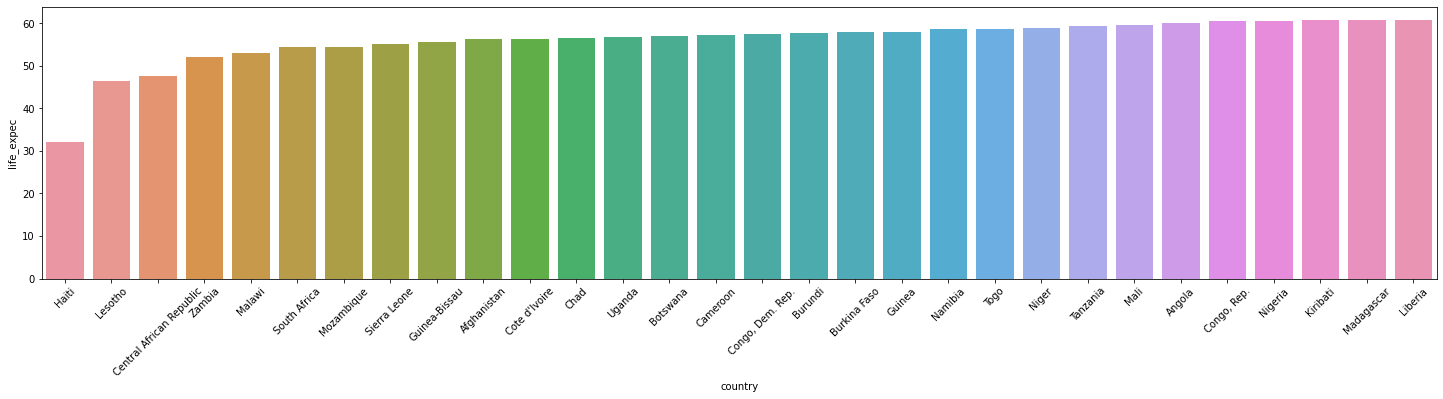

In [ ]:
# S2.10: Create a DataFrame for Life expectancy in ascending order.


life_expec_df = ngo_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(30)

# Plot top 30 countries exhibiting lowest Life expectancy.
plt.figure(figsize = (25,5))
sns.barplot(x = 'country', y = 'life_expec', data = life_expec_df)
plt.xticks(rotation = 45)
plt.show()

Here we observe that the country **Haiti** has exceptionally low life expectancy of around $30$ years where the world average is at $70$ years. Also, a lot of other countries exhibit lower than average life expectancy. This gives us a rough estimate of the countries which need intervention and assistance for improving the healthcare facilities.

---

#### Activity 3: Determining Cluster Tendency

Before we apply any clustering algorithm to the given dataset, it is essential to determine whether the given data has any meaningful clusters or not. In general, we need to check whether the given dataset is not random.

This process of evaluating whether the dataset is feasible for clustering is know as **clustering tendency**. A well-known test for cluster tendency is the **Hopkins Test**.

**Hopkins test:**

- It is a statistical test that checks if the data follows uniform distribution.
- For example, refer to the following image which illustrates a uniformly distributed dataset.
<center>
    <img src="https://s3-whjr-v2-prod-bucket.whjr.online/58149855-5d35-407d-87f6-452344b69f41.png"/>

    `Image: An example of well-shaped 2D uniformly distributed dataset`

</center>

- Such uniformly distributed dataset is not suitable for clustering.

- If the hopkins score is low (tends to `0`), it means that the data is not uniformly distributed and can be used for clustering.

- If the hopkins score is high (above `0.5`), it means that the data is uniformly distributed and cannot be used for clustering.

**Implementing Hopkins Test using Python:**

- The `pyclustertend` is a Python toolkit for assessing cluster tendency.

- Let us first install `pyclustertend` module using `!pip install`.


In [ ]:
# S3.1: Install 'pyclustertend'
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Once the `pyclustertend` module have been successfully installed, use  `hopkins()` function to determine the hopkins score for your dataset. The syntax for `hopkins()` function is as follows:

`pyclustertend.hopkins(data_frame, sampling_size)`

Where,
- `data_frame`:  The input dataset.
- `sampling_size`: The sampling size which is used to evaluate the number of DataFrame. This value must be equal to or less than the number of rows of our dataset.

    For example, If sampling size is 100, then this function generates 100 random data points which are uniformly distributed and then compares our dataset with these 100 points to determine how much they are similar. If our dataset is very similar to these random uniformly distributed dataset, then we will get a high score otherwise a low score.
This function returns a **hopkins score** of the dataset (between `0` and `1`).  A score tending to `0` express a high cluster tendency and a score around `0.5` express no clusterability.

Let us now perform hopkins test for `ngo_scaled` dataset using a sampling size equal to number of rows of our dataset (i.e. `167`).

**Note:** If you assume a sampling size greater than the number of rows, you will get an error stating that the sampling size is greater than DataFrame size.

In [ ]:
# S3.1: Import hopkins and perform hopkins test for 'ngo_scaled' dataset.
from pyclustertend import hopkins
hopkins(scale_df,167)

0.0834127312459118

You may observe that the hopkins score obtained is almost `0`, indicating that our dataset has high cluster tendency.

Let us now proceed with dendrogram plotting followed by agglomerative clustering.

---

#### Activity 4: Agglomerative Clustering

Let us first plot dendrograms for both single linkage and complete linkage and select the one which yields the best result.

Follow the steps given below to plot the dendrogram for single linkage:

1. Import `linkage` and `dendrogram` modules from `scipy.cluster.hierarchy` module.
2. Call `linkage()` function and pass `ngo_scaled` dataset and `method = single` as inputs. Store the returned linkage matrix in a `s_distances` variable.
3.  Plot the dendrogram by calling the `dendrogram()` function and pass the linkage matrix `s_distances` as input to this function.

4. Also, set the `xlabel` and `ylabel` of this dendrogram using `matplotlib.pyplot` module.

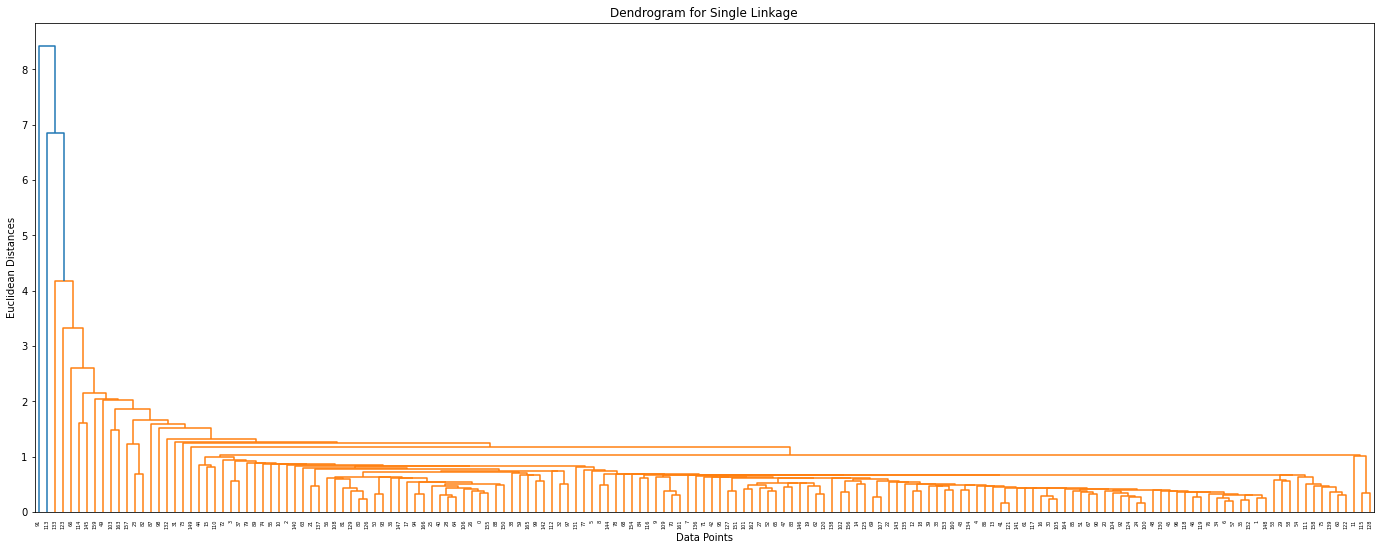

In [ ]:
# S4.1: Plot dendrogram for single linkage.
from scipy.cluster.hierarchy import linkage, dendrogram
s_distances = linkage(scale_df, method = "single")

plt.figure(figsize = (24, 9))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Single Linkage")
dendrogram(s_distances)
plt.show()

The clusters of the single linkage are not truly satisfying. It appears to be placing each outlier in its own cluster.

Let us plot dendrogram for complete linkage and observe the result.

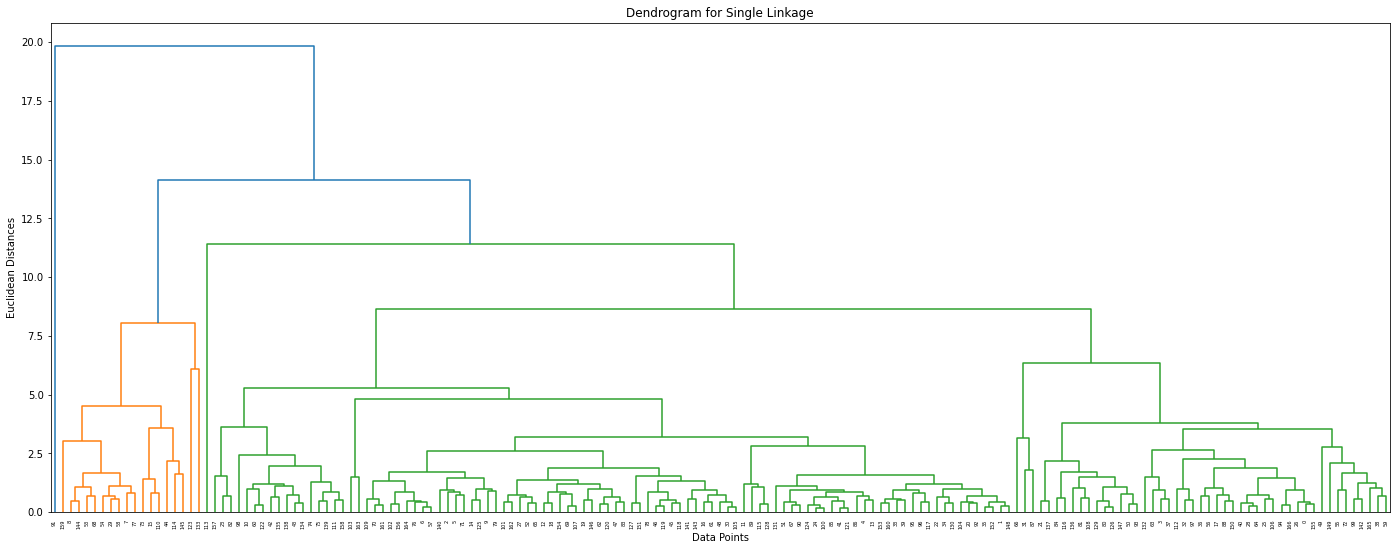

In [ ]:
# S4.2: Plot dendrogram for complete linkage.
comp = linkage(scale_df, method = "complete")

plt.figure(figsize = (24, 9))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Single Linkage")
dendrogram(comp)
plt.show()

The result of complete linkage looks good. From the above plot, we observe that if we draw a horizontal line passing through the longest vertical blue line, it cuts the dendrogram at 3 points and also at 4 points. Hence, the number of clusters can be 3 or 4.

Let us obtain 3 clusters of countries using  agglomerative clustering on complete linkage.

In [ ]:
# S4.3: Determine the clusters using agglomerative clustering
# Import AgglomerativeClustering module from sklearn
from sklearn.cluster import AgglomerativeClustering

# Perform AgglomerativeClustering using n_clusters = 3 and linkage = 'complete'
agg = AgglomerativeClustering(n_clusters = 3,linkage = 'complete')
predict = agg.fit_predict(scale_df)
# Fit and predict the data using DataFrame

As you can see in the output, our dataset is divided into 3 clusters labelled from `0` to `2`.

Let us add these predicted labels as a new column to original DataFrame `ngo_df`.

In [ ]:
# S4.4: Adding the cluster ID back to the ngo_df DataFrame
ngo_df['cluster labels']= predict

Let us determine the number of countries in each cluster.

In [ ]:
# S4.5: Checking the country count per cluster


Hence, we can observe the number of countries in each cluster.

We will stop here. In the next class, we will visualise and analyse these clusters to identify the countries which are in dire need of financial aid.



---

### **Project**
You can now attempt the **Applied Tech Project 113 - Hierarchical Clustering II** on your own.

**Applied Tech Project 113 - Hierarchical Clustering II**: https://colab.research.google.com/drive/1wol1aX4wxC3ghNosb53k4rowwImkioxP

---